In [ ]:
#PROJECT 2

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('content')

Mounted at content


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd content/My Drive/Project_Cluster
sales_df = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape')
# Note: MSRP is the manufacturer's suggested retail price (MSRP) or sticker price represents the suggested retail price of products. 
# MSRP is used to standardize the price of products over multiple company store locations.

[Errno 2] No such file or directory: 'content/My Drive/Project_Cluster'
/content/content/My Drive/Project_Cluster


In [ ]:
sales_df.info()

sales_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
#Non-null values are ADDLine2, STATE, PostalCODE and TERRITORY. First we look at territory
sales_df['TERRITORY'].unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

In [ ]:
sales_df['TERRITORY'].unique()

sales_df[sales_df['TERRITORY'].isnull()]['COUNTRY'].unique()

array(['USA', 'Canada'], dtype=object)

In [ ]:
#STATE drop cuz its all over the country
#ADDRESS 2 drop cuz too many null values
#ADDRESS LINE 1, POSTALCODE drop cuz minute address is useless for analysis; Postalcode mightve been useful for a city or a county,not all over the world
#Drop CITY cuz I dunno
#Phone number and state drop cuz they uselessfor analysis. NO insight
# 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER', useless for analysis

In [ ]:
#nan values territory are from orders places in Canada and USA. 
sales_df['TERRITORY'].fillna('CUSA',inplace=True)

In [ ]:
sales_df[sales_df['TERRITORY']=='CUSA']['COUNTRY'].unique()

array(['USA', 'Canada'], dtype=object)

In [ ]:
#Since the orders are on a global scale, the address lines, state, phone ordernumber and posyalcode are not useful for analysis. We drop em.

sales_df.drop(['ADDRESSLINE1','ADDRESSLINE2','STATE', 'POSTALCODE','PHONE', 'ORDERNUMBER'],axis=1,inplace=True)

In [ ]:
sales_df.info()
sales_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   ORDERDATE         2823 non-null   object 
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  CITY              2823 non-null   object 
 14  COUNTRY           2823 non-null   object 
 15  TERRITORY         2823 non-null   object 
 16  CONTACTLASTNAME   2823 non-null   object 


QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
CITY                0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [ ]:
#No null values. We also drop CONTACTLASTNAME, CONTACTFIRSTNAME, CUSTOMERNAME
sales_df.drop(['CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'CUSTOMERNAME'], axis=1, inplace=True)

In [ ]:
print('Unique countries {x}'.format(x=sales_df['COUNTRY'].nunique()))
print('Unique cities {x}'.format(x=sales_df['CITY'].nunique()))

Unique countries 19
Unique cities 73


<function matplotlib.pyplot.tight_layout>

<Figure size 1020x1020 with 0 Axes>

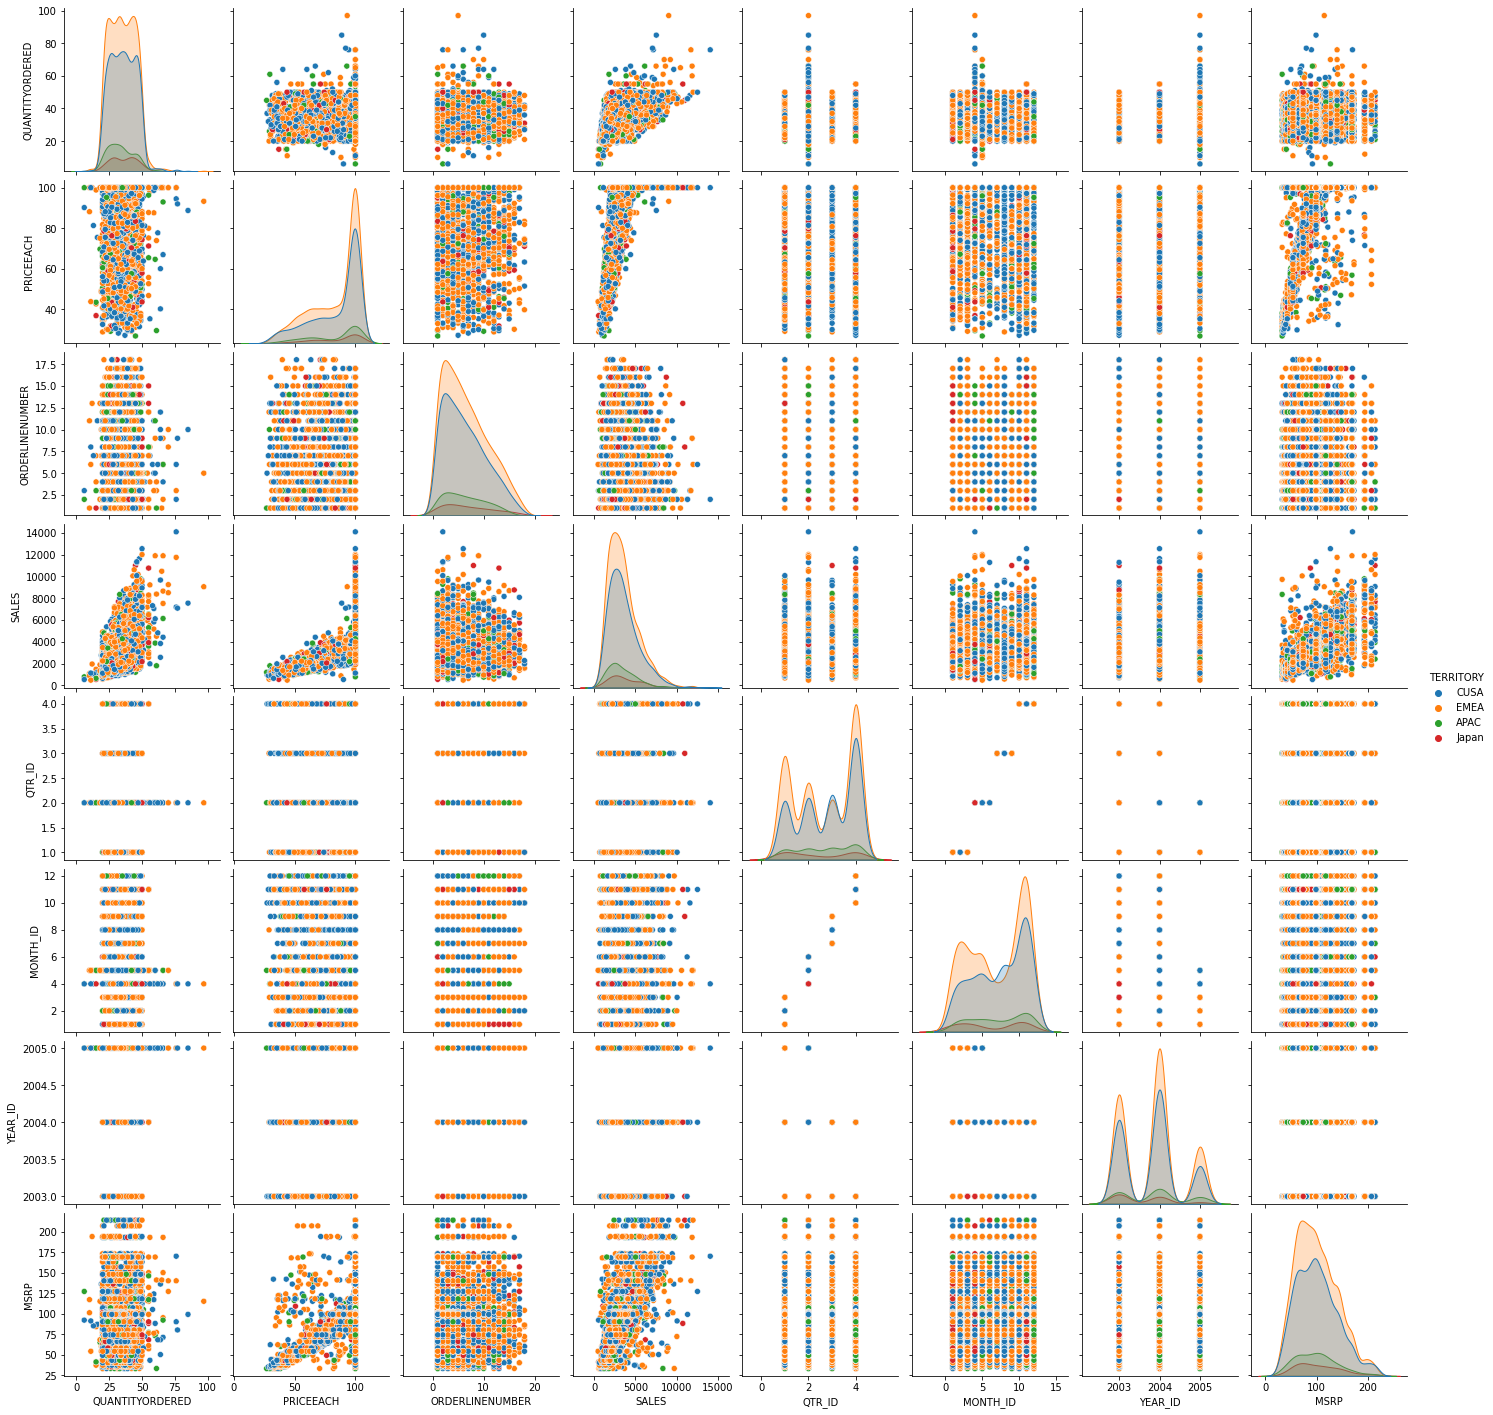

In [ ]:
plt.figure(figsize=(6,6),dpi=170)
sns.pairplot(sales_df,hue='TERRITORY')
plt.tight_layout

In [ ]:
#Too many cities.
sales_df.drop('CITY',axis=1,inplace=True)
#Converting to datetime format
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])

In [ ]:
sales_df.info()

sales_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2823 non-null   int64         
 1   PRICEEACH        2823 non-null   float64       
 2   ORDERLINENUMBER  2823 non-null   int64         
 3   SALES            2823 non-null   float64       
 4   ORDERDATE        2823 non-null   datetime64[ns]
 5   STATUS           2823 non-null   object        
 6   QTR_ID           2823 non-null   int64         
 7   MONTH_ID         2823 non-null   int64         
 8   YEAR_ID          2823 non-null   int64         
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  PRODUCTCODE      2823 non-null   object        
 12  COUNTRY          2823 non-null   object        
 13  TERRITORY        2823 non-null   object        
 14  DEALSIZE         2823 non-null   object 

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
TERRITORY             4
DEALSIZE              3
dtype: int64

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [ ]:
#Function to visualize the value_counts of a column using plotly 
def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = sales_df[x].value_counts().index, y = sales_df[x].value_counts(), color = sales_df[x].unique(), height = 600,title=x)
  fig.show()

In [ ]:
barplot_visualization('COUNTRY')

In [ ]:
barplot_visualization('STATUS')

In [ ]:
sales_df.drop('STATUS',axis=1,inplace=True )

In [ ]:
barplot_visualization('DEALSIZE')

In [ ]:
barplot_visualization('PRODUCTLINE')

In [ ]:
barplot_visualization('TERRITORY')

In [ ]:
barplot_visualization('DEALSIZE')

In [ ]:
#Function to get dummy variables and drop old column
def dummify(x):
  global sales_df
  dummy = pd.get_dummies(sales_df[x])
  sales_df = pd.concat([sales_df, dummy], axis = 1)  
  sales_df.drop(columns = x , inplace = True)
  return sales_df
   

In [ ]:
dummify('COUNTRY')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2823 non-null   int64         
 1   PRICEEACH        2823 non-null   float64       
 2   ORDERLINENUMBER  2823 non-null   int64         
 3   SALES            2823 non-null   float64       
 4   ORDERDATE        2823 non-null   datetime64[ns]
 5   QTR_ID           2823 non-null   int64         
 6   MONTH_ID         2823 non-null   int64         
 7   YEAR_ID          2823 non-null   int64         
 8   PRODUCTLINE      2823 non-null   object        
 9   MSRP             2823 non-null   int64         
 10  PRODUCTCODE      2823 non-null   object        
 11  COUNTRY          2823 non-null   object        
 12  TERRITORY        2823 non-null   object        
 13  DEALSIZE         2823 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(

In [ ]:
dummify('TERRITORY')
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,DEALSIZE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,APAC,CUSA,EMEA,Japan
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,Small,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,Small,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,Medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,Medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,Medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
dummify('PRODUCTLINE')
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,DEALSIZE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,APAC,CUSA,EMEA,Japan,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,Small,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,Small,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,Medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,Medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,Medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
dummify('DEALSIZE')
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,APAC,CUSA,EMEA,Japan,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QUANTITYORDERED   2823 non-null   int64         
 1   PRICEEACH         2823 non-null   float64       
 2   ORDERLINENUMBER   2823 non-null   int64         
 3   SALES             2823 non-null   float64       
 4   ORDERDATE         2823 non-null   datetime64[ns]
 5   QTR_ID            2823 non-null   int64         
 6   MONTH_ID          2823 non-null   int64         
 7   YEAR_ID           2823 non-null   int64         
 8   MSRP              2823 non-null   int64         
 9   PRODUCTCODE       2823 non-null   object        
 10  Australia         2823 non-null   uint8         
 11  Austria           2823 non-null   uint8         
 12  Belgium           2823 non-null   uint8         
 13  Canada            2823 non-null   uint8         
 14  Denmark           2823 n

In [ ]:
sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QUANTITYORDERED   2823 non-null   int64         
 1   PRICEEACH         2823 non-null   float64       
 2   ORDERLINENUMBER   2823 non-null   int64         
 3   SALES             2823 non-null   float64       
 4   ORDERDATE         2823 non-null   datetime64[ns]
 5   QTR_ID            2823 non-null   int64         
 6   MONTH_ID          2823 non-null   int64         
 7   YEAR_ID           2823 non-null   int64         
 8   MSRP              2823 non-null   int64         
 9   PRODUCTCODE       2823 non-null   int8          
 10  Australia         2823 non-null   uint8         
 11  Austria           2823 non-null   uint8         
 12  Belgium           2823 non-null   uint8         
 13  Canada            2823 non-null   uint8         
 14  Denmark           2823 n

In [ ]:
#Look at slaes by orderdate
sales_df_group = sales_df.groupby(by = "ORDERDATE").sum()
sales_df_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,APAC,CUSA,EMEA,Japan,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4,0,0,0,0,0,0,0,0,4,0,2,2
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181.0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,4,0,2,2
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,2,0,1,1
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723.0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,16,0,3,0,0,0,0,7,6,0,10,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,13,0,7,0,0,0,2,4,0,0,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,30,12030,728,101.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,6,0,0,6,0,0,0,0,0,2,3,1
2005-05-17,509,1269.43,105,59475.10,28,70,28070,1669,462.0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,14,0,0,0,0,0,0,2,8,4
2005-05-29,607,1148.40,94,51233.18,30,75,30075,1328,797.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,13,2,0,0,7,0,0,0,0,0,8,0,8,7


In [ ]:
fig = px.line(x = sales_df_group.index, y = sales_df_group['SALES'], title = 'Sales')
fig.show()

In [ ]:
fig = px.line(x = sales_df.groupby(by = "MONTH_ID").sum().index, y = sales_df.groupby(by = "MONTH_ID").sum()['SALES'], title = 'Sales')
fig.show()

In [ ]:
#ORDERDATE can be dropped as similar information can be obtained from YEAR_ID and MONTH_ID
sales_df.drop("ORDERDATE", axis = 1, inplace = True)

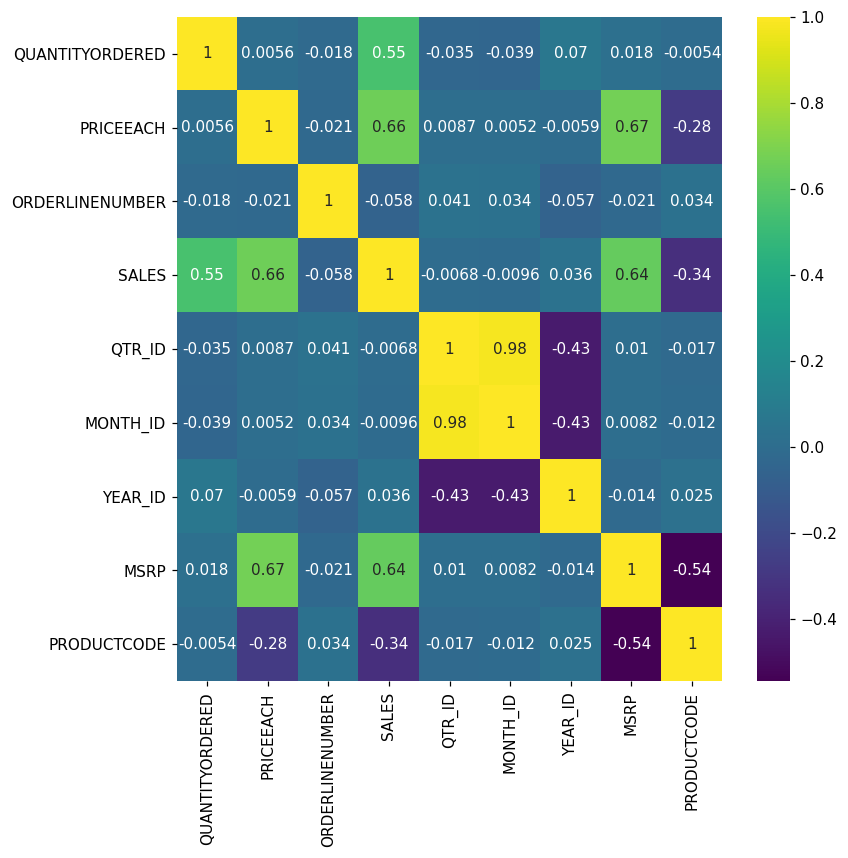

In [ ]:
plt.figure(figsize=(8,8),dpi=110)
sns.heatmap(sales_df.iloc[:,:9].corr(),annot=True,cmap='viridis')

In [ ]:
#MONTH_ID and QTR_ID are too highly correlated. Makes sense. Redundant information. Dropping QTR_ID
sales_df.drop('QTR_ID',axis=1,inplace=True)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   MONTH_ID          2823 non-null   int64  
 5   YEAR_ID           2823 non-null   int64  
 6   MSRP              2823 non-null   int64  
 7   PRODUCTCODE       2823 non-null   int8   
 8   Australia         2823 non-null   uint8  
 9   Austria           2823 non-null   uint8  
 10  Belgium           2823 non-null   uint8  
 11  Canada            2823 non-null   uint8  
 12  Denmark           2823 non-null   uint8  
 13  Finland           2823 non-null   uint8  
 14  France            2823 non-null   uint8  
 15  Germany           2823 non-null   uint8  
 16  Ireland           2823 non-null   uint8  


In [ ]:
plt.figure(figsize = (10, 10))

for i in range(8):
  if sales_df.columns[i] != 'ORDERLINENUMBER':
    fig = ff.create_distplot([sales_df[sales_df.columns[i]].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text = sales_df.columns[i])
    fig.show()

<Figure size 720x720 with 0 Axes>

In [ ]:
# Let's plot distplots
# Distplot shows the (1) histogram, (2) kde plot and (3) rug plot.
# (1) Histogram: it's a graphical display of data using bars with various heights. Each bar groups numbers into ranges and taller bars show that more data falls in that range.
# (2) Kde Plot: Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable.
# (3) Rug plot: plot of data for a single quantitative variable, displayed as marks along an axis (one-dimensional scatter plot).

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MONTH_ID',
       'YEAR_ID', 'MSRP', 'PRODUCTCODE', 'Australia', 'Austria', 'Belgium',
       'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Italy',
       'Japan', 'Norway', 'Philippines', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'UK', 'USA', 'APAC', 'CUSA', 'EMEA', 'Japan',
       'Classic Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains',
       'Trucks and Buses', 'Vintage Cars', 'Large', 'Medium', 'Small'],
      dtype='object')

In [ ]:
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(sales_df,
    dimensions = sales_df.columns[:8], color = 'MONTH_ID')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()


<Figure size 1080x1080 with 0 Axes>

In [ ]:
# A trend exists between 'SALES' and 'QUANTITYORDERED'  
# A trend exists between 'MSRP' and 'PRICEEACH'  
# A trend exists between 'PRICEEACH' and 'SALES'
# It seems that sales growth exists as we move from 2013 to 2014 to 2015 ('SALES' vs. 'YEAR_ID')
# zoom in into 'SALES' and 'QUANTITYORDERED', you will be able to see the monthly information color coded on the graph

#DATA is now ready for K-Means

END

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler= StandardScaler()
scaled_sales_df= scaler.fit_transform(sales_df)

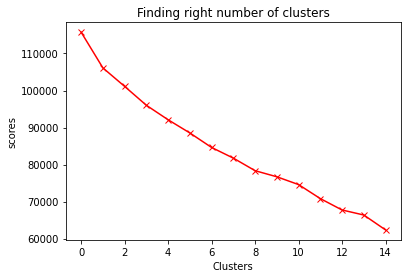

In [ ]:
#Finding optimal k value using elbow

scores = []

range_values = range(1, 16)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_sales_df)
  scores.append(kmeans.inertia_) # intertia is the Sum of squared distances of samples to their closest cluster center

plt.plot(scores, 'rx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()


In [ ]:
#We choose cluster 6

kmeans = KMeans(6)
kmeans.fit(scaled_sales_df)
labels= kmeans.predict(scaled_sales_df)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
kmeans.cluster_centers_.shape

(6, 41)

In [ ]:
# 6 Cluster centres in a 41-d space. DF below shows the points of each cluster in that dimesion/feature space.
cluster_centers

array([[ 3.54230769e+01,  8.25050000e+01,  6.96153846e+00,
         3.61861173e+03,  4.88461538e+00,  2.00419231e+03,
         1.00192308e+02,  5.87692308e+01,  1.38777878e-17,
         1.73472348e-17,  3.46944695e-18,  1.38777878e-17,
         1.38777878e-17, -6.93889390e-18,  8.32667268e-17,
         3.12250226e-17, -3.46944695e-18, -6.93889390e-18,
         1.00000000e+00,  1.04083409e-17, -6.93889390e-18,
        -3.46944695e-18, -1.38777878e-17,  2.08166817e-17,
        -3.46944695e-18,  2.08166817e-17, -5.55111512e-17,
        -6.93889390e-17,  3.88578059e-16, -2.22044605e-16,
         1.00000000e+00,  1.53846154e-01,  1.73076923e-01,
         3.07692308e-01,  9.61538462e-02,  3.84615385e-02,
         5.76923077e-02,  1.73076923e-01,  5.76923077e-02,
         4.03846154e-01,  5.38461538e-01],
       [ 3.06699029e+01,  6.80285049e+01,  6.60582524e+00,
         2.03262383e+03,  7.11456311e+00,  2.00379320e+03,
         7.43902913e+01,  6.48922330e+01,  5.96744876e-16,
         2.03

In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers_inv = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers_inv
#Refer jup lab for below explanation
# Cluster 0 (Highest) - This group represents customers who buy items in high quantity centered around ~47, they buy items in all price range leaning towards high price items of ~99. They also correspond to the highest total sales around ~8296 and they are active throughout the year. They are the highest buyers of products with high MSRP ~158.
# Cluster 1 - This group represents customers who buy items in varying quantity ~35, they tend to buy high price items ~96. Their sales is bit better average ~4435, they buy products with second highest MSRP of ~133.
# Cluster 2 (lowest) - This group represents customers who buy items in low quantity ~30. They tend to buy low price items ~68. Their sales ~2044 is lower than other clusters and they are extremely active around holiday season. They buy products with low MSRP ~75.
# Cluster 3 - This group represents customers who are only active during the holidays. they buy in lower quantity ~35, but they tend to buy average price items around ~86. They also correspond to lower total sales around ~3673, they tend to buy items with MSRP around 102.
# Cluster 4 - This group represents customers who buy items in varying quantity ~39, they tend to buy average price items ~94. Their sales ~4280.

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,APAC,CUSA,EMEA,Japan,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,35.423077,82.505000,6.961538,3618.611731,4.884615,2004.192308,100.192308,58.769231,1.387779e-17,1.734723e-17,3.469447e-18,1.387779e-17,1.387779e-17,-6.938894e-18,8.326673e-17,3.122502e-17,-3.469447e-18,-6.938894e-18,1.000000e+00,1.040834e-17,-6.938894e-18,-3.469447e-18,-1.387779e-17,2.081668e-17,-3.469447e-18,2.081668e-17,-5.551115e-17,-6.938894e-17,3.885781e-16,-2.220446e-16,1.000000e+00,0.153846,0.173077,0.307692,0.096154,0.038462,0.057692,0.173077,5.769231e-02,4.038462e-01,0.538462
1,30.669903,68.028505,6.605825,2032.623825,7.114563,2003.793204,74.390291,64.892233,5.967449e-16,2.038835e-02,1.747573e-02,3.398058e-02,2.524272e-02,3.786408e-02,1.388350e-01,2.718447e-02,7.766990e-03,6.019417e-02,6.245005e-17,3.398058e-02,1.067961e-02,1.650485e-02,1.446602e-01,2.135922e-02,3.883495e-03,1.207368e-15,4.000000e-01,-7.771561e-16,4.339806e-01,5.388350e-01,2.718447e-02,0.247573,0.123301,0.127184,0.109709,0.043689,0.096117,0.252427,9.228729e-16,-1.110223e-15,1.000000
2,38.865819,95.434040,6.371469,4759.074760,6.737288,2003.858757,120.693503,46.853107,4.579670e-16,4.802260e-02,2.118644e-02,1.283695e-16,5.225989e-02,7.485876e-02,2.415254e-01,4.802260e-02,1.129944e-02,7.203390e-02,9.020562e-17,7.062147e-02,7.459311e-17,2.879641e-16,2.725989e-01,4.943503e-02,3.813559e-02,4.510281e-16,-4.385381e-15,-1.165734e-15,-4.662937e-15,1.000000e+00,-1.526557e-16,0.451977,0.096045,0.091808,0.073446,0.022599,0.114407,0.149718,1.031073e-01,8.700565e-01,0.026836
3,38.357784,95.877814,6.200599,4725.196527,7.384731,2003.784431,121.508982,44.238024,4.302114e-16,2.359224e-16,-3.122502e-17,5.239521e-02,1.526557e-16,-2.983724e-16,5.273559e-16,-1.734723e-16,6.331741e-17,2.428613e-16,5.898060e-17,1.283695e-16,2.245509e-02,3.892216e-02,1.346145e-15,-1.908196e-16,-5.898060e-17,3.122502e-16,8.862275e-01,-1.040834e-15,9.386228e-01,1.165734e-15,6.137725e-02,0.404192,0.137725,0.080838,0.058383,0.013473,0.115269,0.190120,1.032934e-01,8.607784e-01,0.035928
4,34.812500,82.518750,7.131944,3325.558750,8.097222,2003.701389,96.361111,58.055556,-1.249001e-16,-5.204170e-17,-2.602085e-17,1.387779e-17,-5.551115e-17,-4.857226e-17,9.714451e-17,-1.387779e-17,-4.336809e-18,9.714451e-17,4.857226e-17,9.367507e-17,-1.040834e-17,-2.775558e-17,-2.636780e-16,2.081668e-17,3.989864e-17,1.000000e+00,6.106227e-16,1.526557e-16,4.996004e-16,1.000000e+00,-1.526557e-16,0.319444,0.062500,0.104167,0.159722,0.027778,0.055556,0.270833,2.777778e-02,4.930556e-01,0.479167
5,33.855204,82.860045,6.371041,3376.116878,7.108597,2003.855204,99.515837,48.977376,8.371041e-01,-6.591949e-17,2.255141e-17,6.245005e-17,-1.006140e-16,3.469447e-17,-3.053113e-16,-5.898060e-17,-1.821460e-17,-5.551115e-17,6.245005e-17,1.075529e-16,2.949030e-17,1.628959e-01,1.804112e-16,7.632783e-17,5.551115e-17,-1.665335e-16,1.110223e-15,1.000000e+00,-1.221245e-15,-8.881784e-16,6.938894e-18,0.307692,0.117647,0.113122,0.009050,0.004525,0.149321,0.298643,3.619910e-02,4.570136e-01,0.506787


In [ ]:
# Add a label (which cluster) corresponding to each data point
sale_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,APAC,CUSA,EMEA,Japan,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,3
1,34,81.35,5,2765.90,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
2,41,94.74,2,3884.34,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,2
3,45,83.26,6,3746.70,8,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,3
4,49,100.00,14,5205.27,10,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
2819,29,100.00,1,3978.51,1,2005,54,108,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,2
2820,43,100.00,4,5417.57,3,2005,54,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,2
2821,34,62.24,1,2116.16,3,2005,54,108,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1


In [ ]:
sale_df_cluster.rename(columns={'cluster':'Cluster'},inplace=True)
sale_df_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,APAC,CUSA,EMEA,Japan,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,Cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,3
1,34,81.35,5,2765.90,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
2,41,94.74,2,3884.34,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,2
3,45,83.26,6,3746.70,8,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,3
4,49,100.00,14,5205.27,10,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
2819,29,100.00,1,3978.51,1,2005,54,108,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,2
2820,43,100.00,4,5417.57,3,2005,54,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,2
2821,34,62.24,1,2116.16,3,2005,54,108,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1


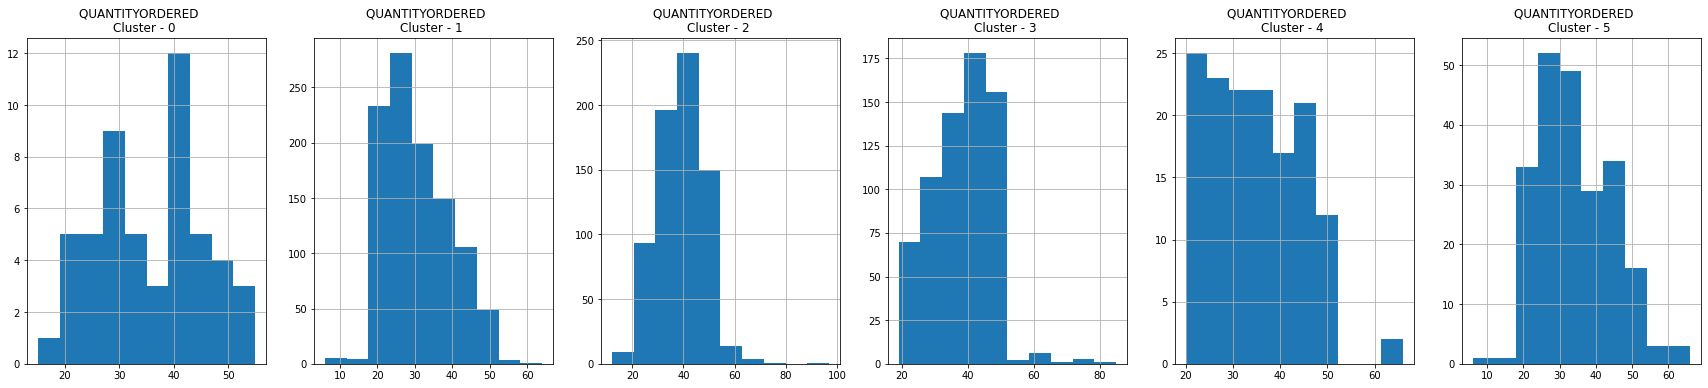

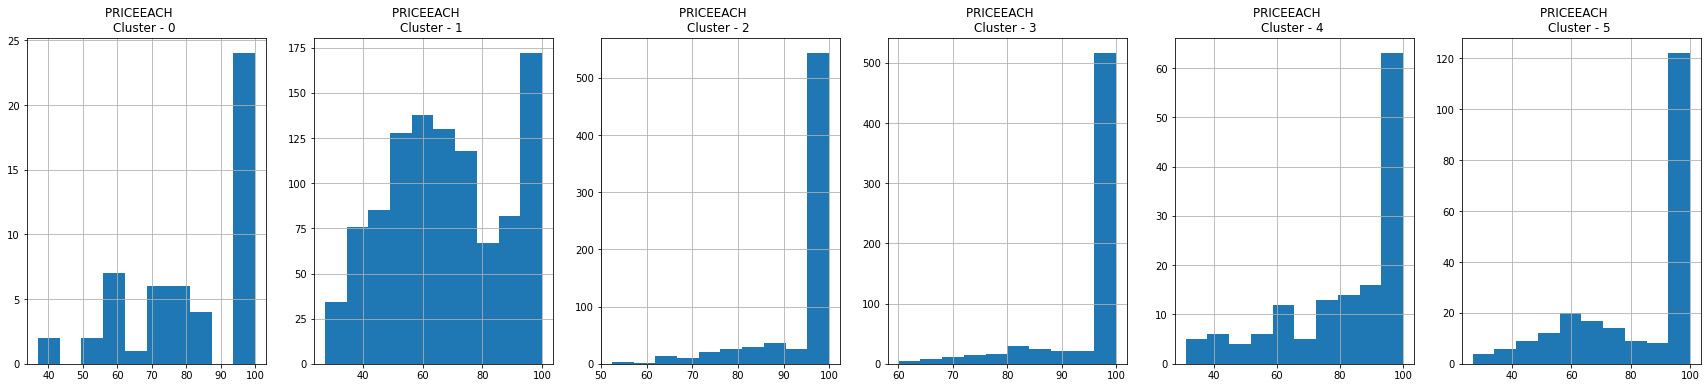

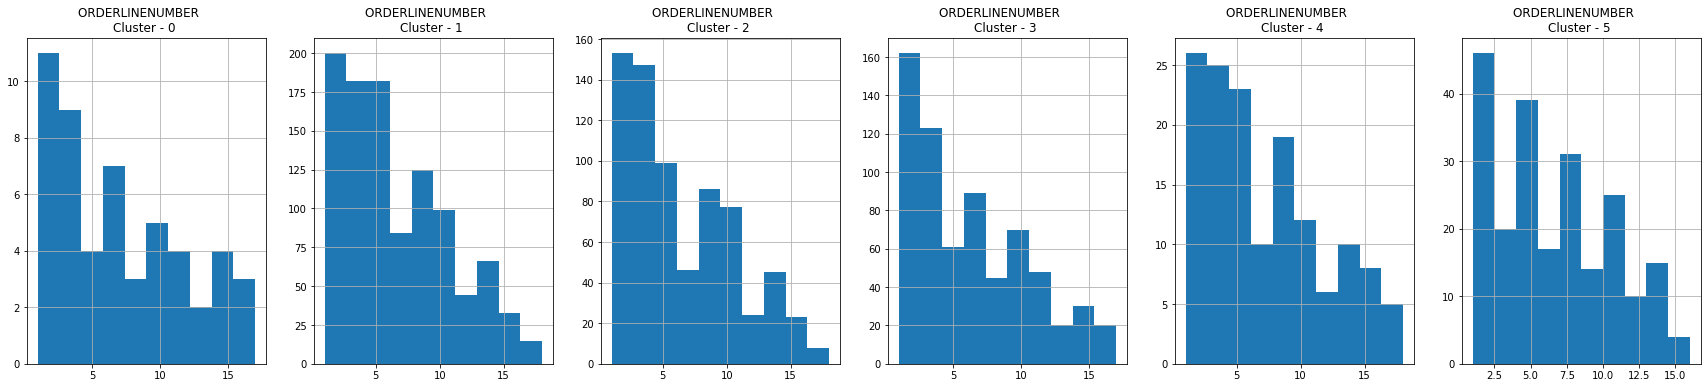

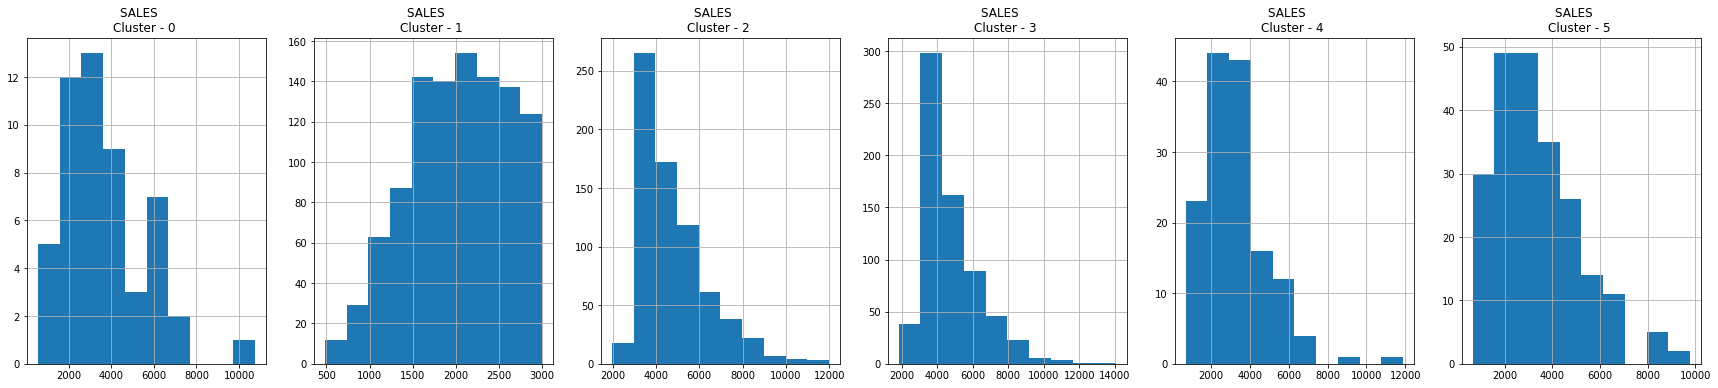

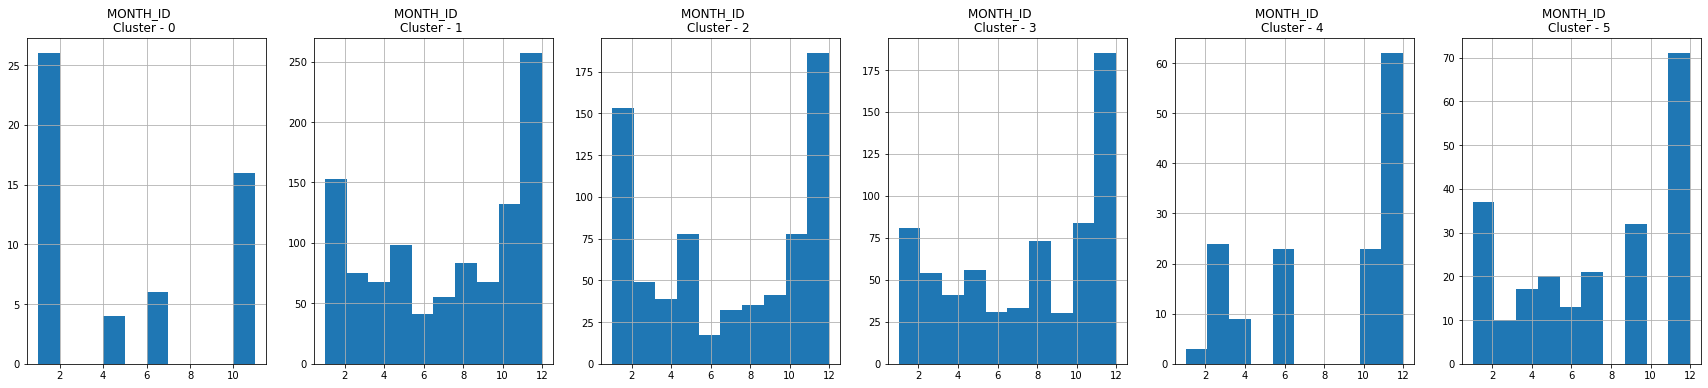

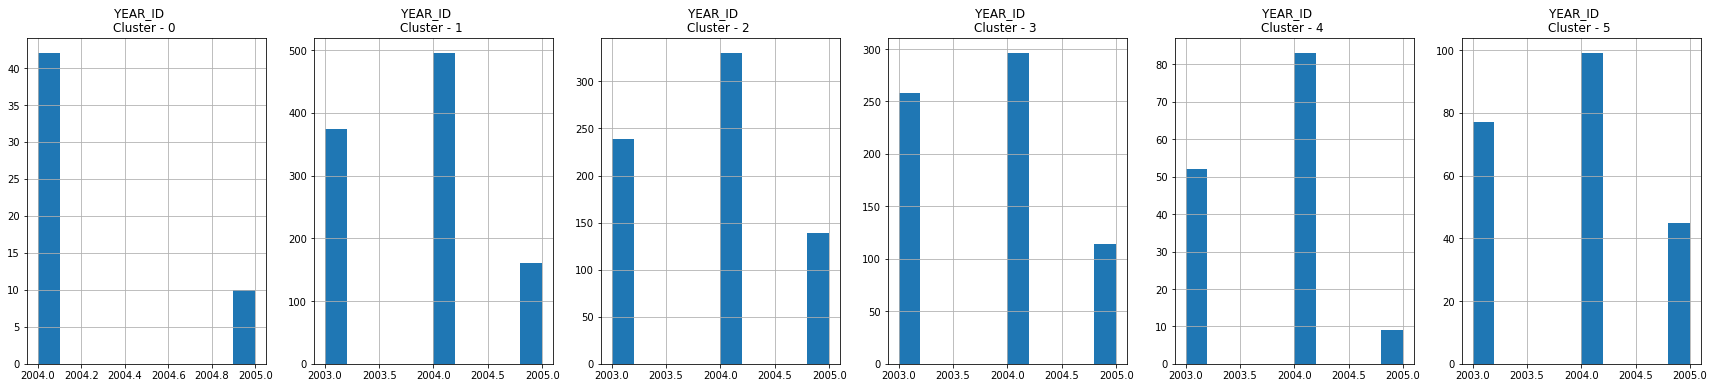

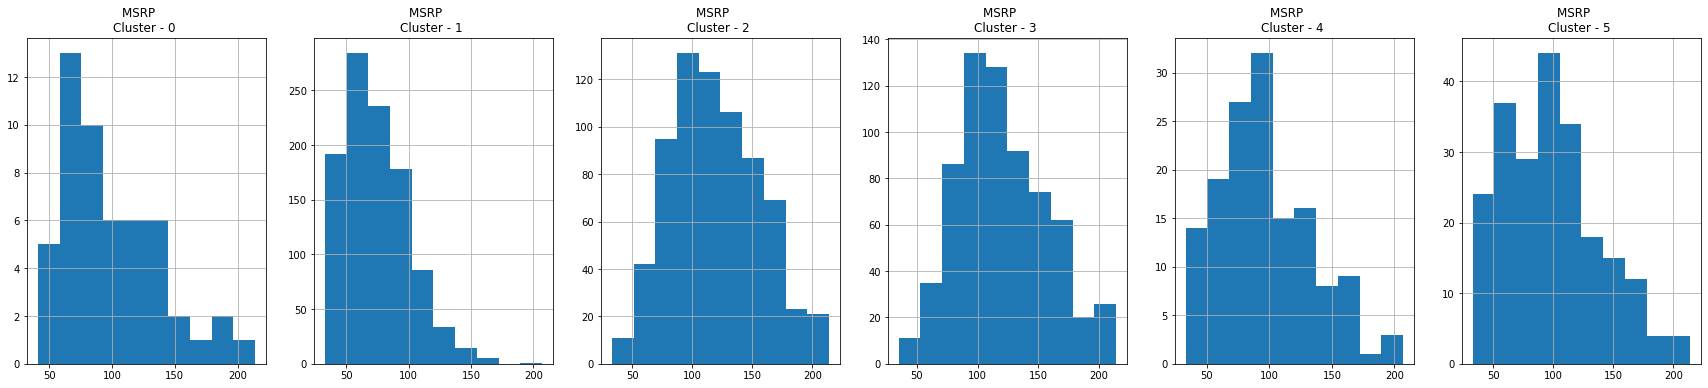

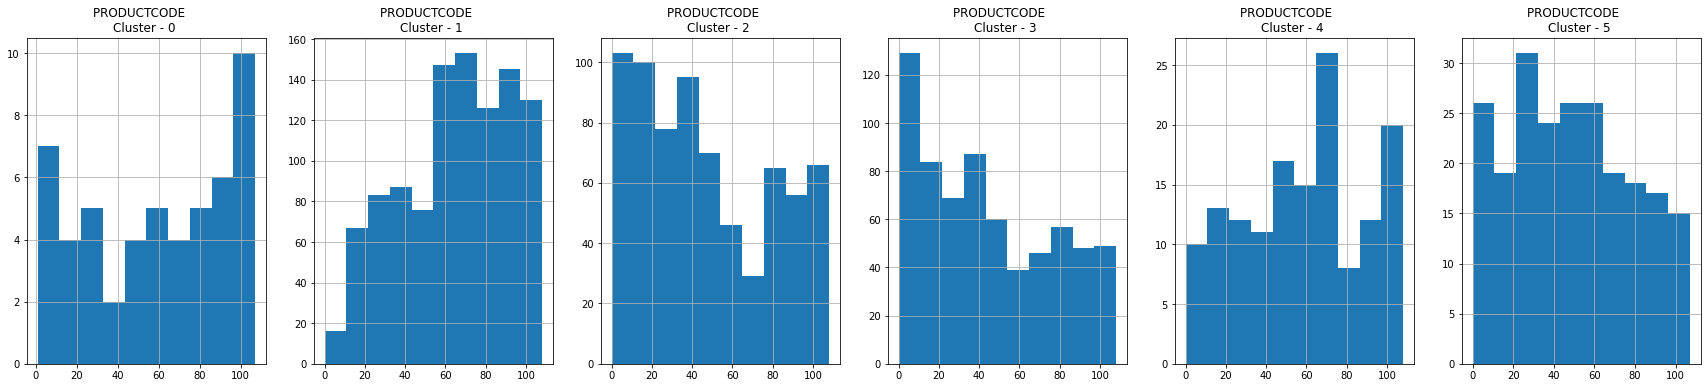

In [ ]:
sales_df['ORDERLINENUMBER'] = sales_df['ORDERLINENUMBER'].apply(lambda x: float(x))

# plot histogram for each feature based on cluster 
for i in sales_df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(6):
    plt.subplot(1, 6, j+1)
    cluster = sale_df_cluster[sale_df_cluster['Cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()

In [ ]:
#We cant visualize 41 dimensional clusters. So we use PCA to visualize the clustrs in 3D space.
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(scaled_sales_df)
principal_comp
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.361756,2.395553,-0.275019
1,-0.852869,-1.376493,-0.252220
2,1.361000,-1.462069,-0.353156
3,1.413032,2.369403,-0.427625
4,2.099043,2.313097,-0.440110


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis = 1)
pca_df

,pca1,pca2,pca3,Cluster
0,-0.361756,2.395553,-0.275019,3
1,-0.852869,-1.376493,-0.252220,1
2,1.361000,-1.462069,-0.353156,2
3,1.413032,2.369403,-0.427625,3
4,2.099043,2.313097,-0.440110,3
...,...,...,...,...
2818,-2.522896,-1.670480,-1.122092,1
2819,-0.236119,-1.857004,-1.212149,2
2820,0.309805,-1.937868,-1.335120,2
2821,-2.862534,-1.703771,-1.190224,1


In [ ]:
# Visualize clusters using 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',color = 'Cluster',  opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))
fig.show()

In [ ]:
#Lot of noise between clusters. Lets use Autoencoder for cleaning it up.
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
sales_df.shape

(2823, 41)

In [ ]:
input_df= Input(shape = (41,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(1000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(41, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - used for dimensionality reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

In [ ]:
autoencoder.fit(sales_df,sales_df, batch_size = 128,epochs = 500, verbose = 3)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [ ]:
autoencoder.save_weights('final_autoencoder.h5')
prediction = encoder.predict(scaled_sales_df)

In [ ]:
prediction

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.7004324 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.68095684],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.72355485],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.69946116],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.6638136 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.62207943]], dtype=float32)

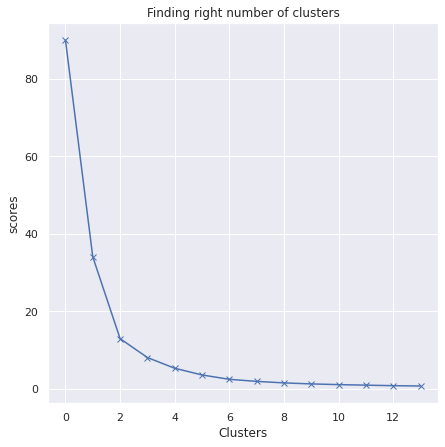

In [ ]:
#elbow method
scores = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(prediction)
  scores.append(kmeans.inertia_)
plt.figure(figsize=(7,7))
plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [ ]:
#2 is too few. So use 3 clusters.
kmeans = KMeans(3)
kmeans.fit(prediction)
labels = kmeans.predict(prediction)


In [ ]:
df_cluster_reduce = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_reduce.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,APAC,CUSA,EMEA,Japan,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2.0,2871.00,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,34,81.35,5.0,2765.90,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,41,94.74,2.0,3884.34,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,45,83.26,6.0,3746.70,8,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,49,100.00,14.0,5205.27,10,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


ValueError: ignored

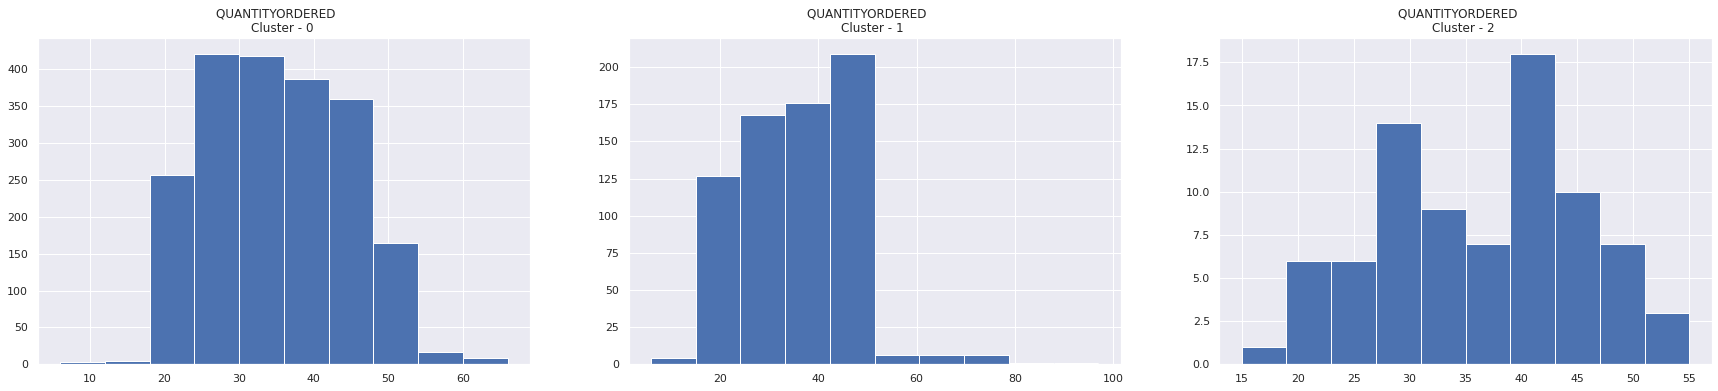

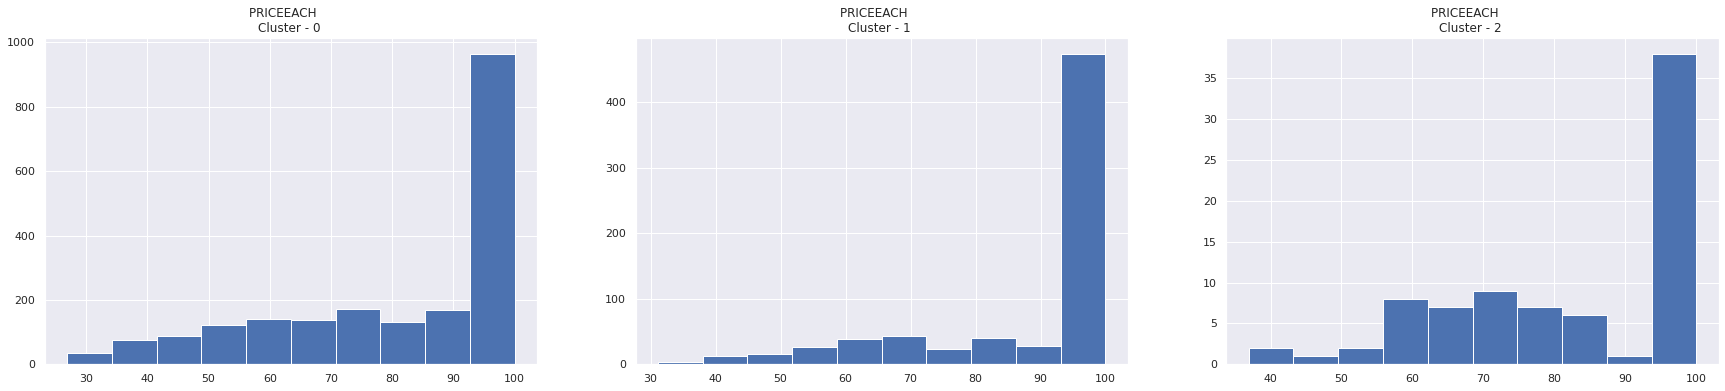

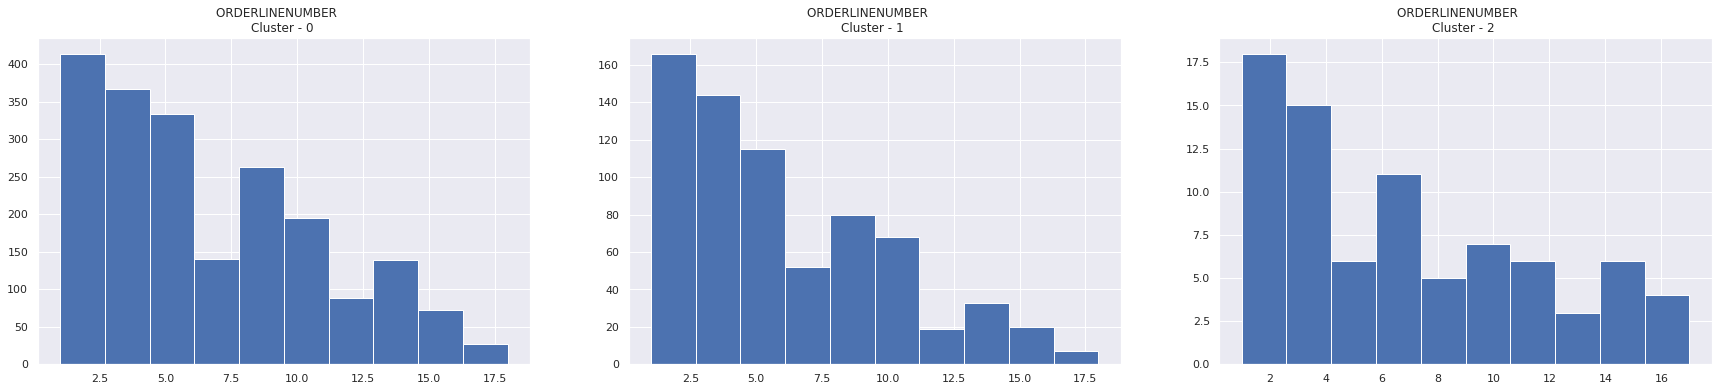

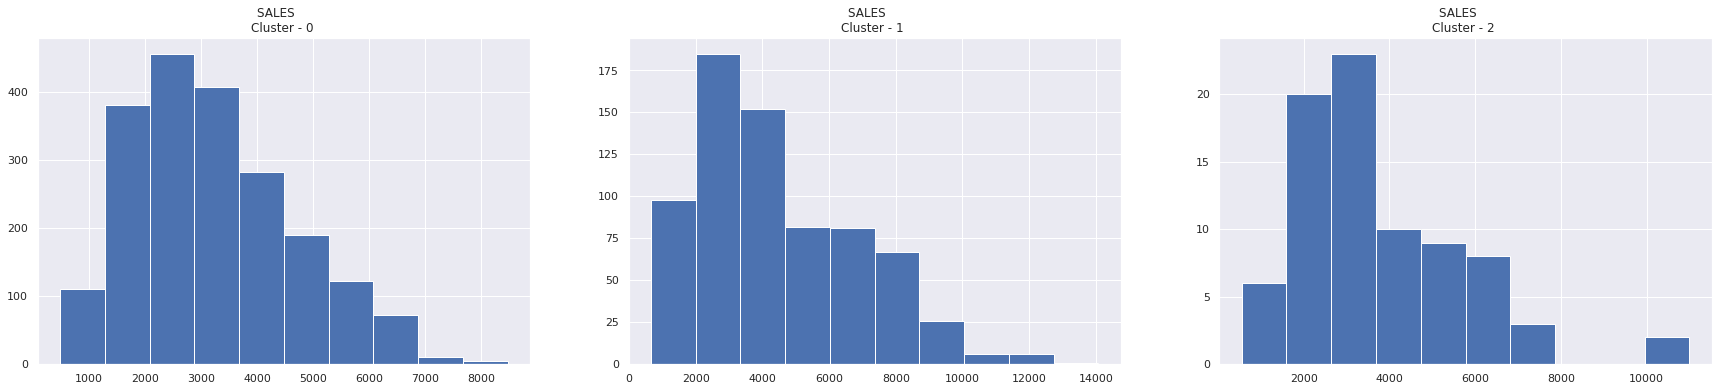

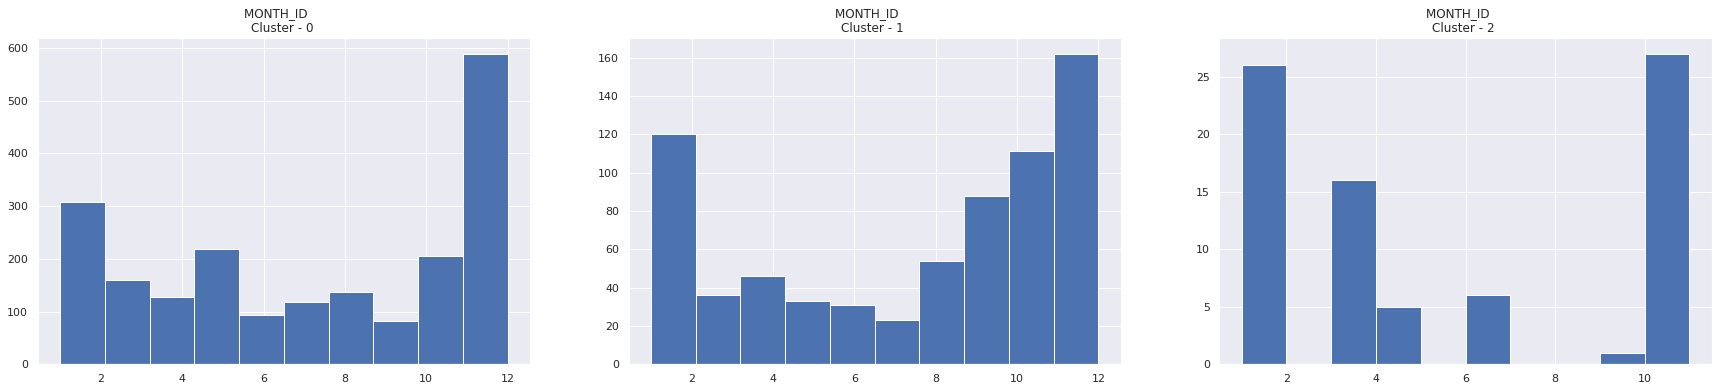

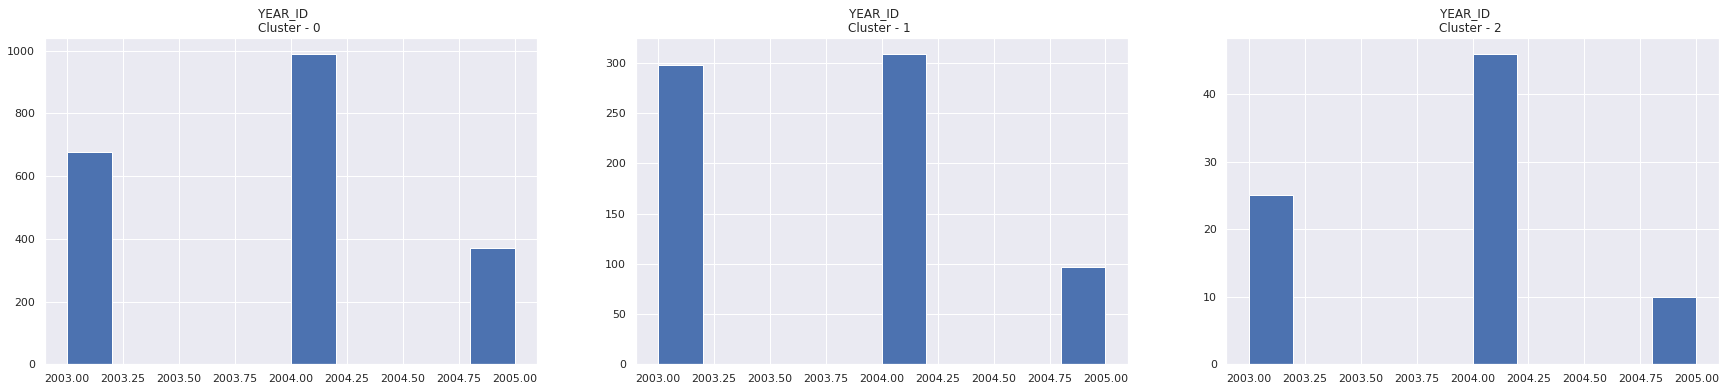

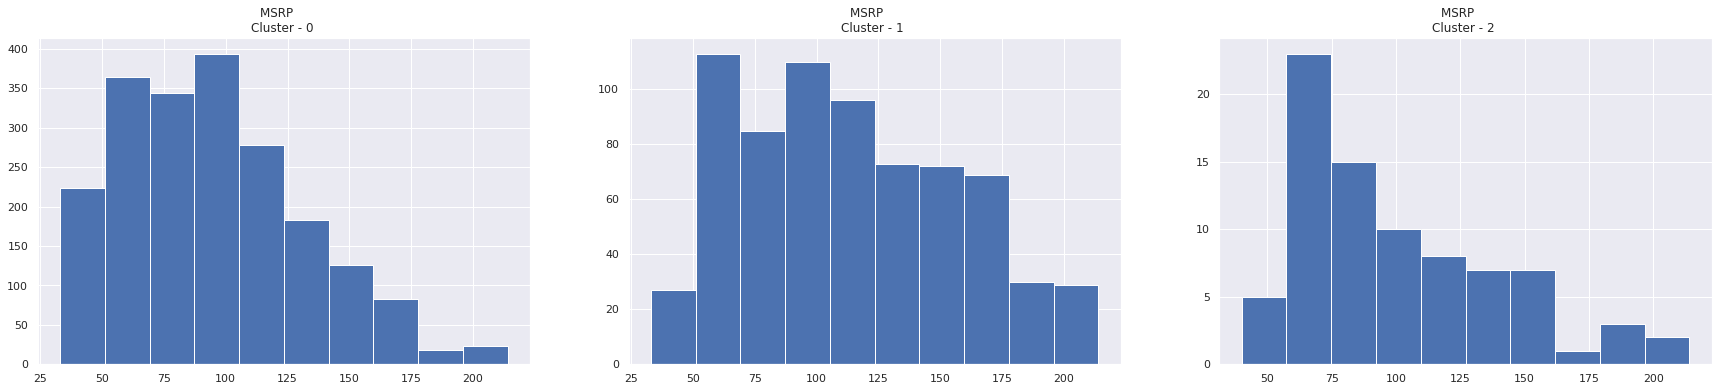

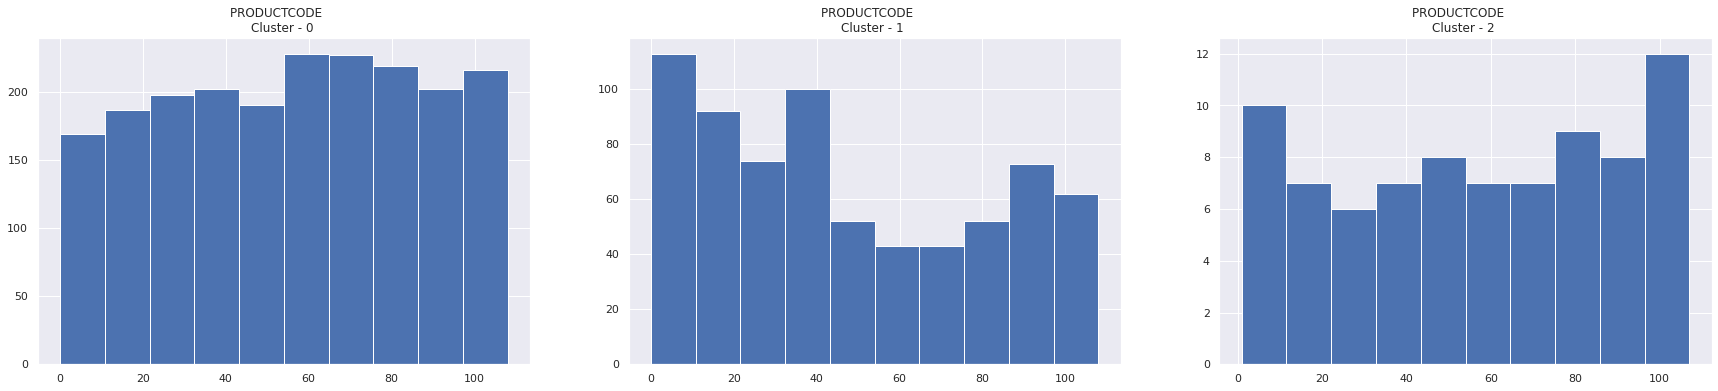

In [ ]:
# plot histogram for each feature based on cluster 
for i in sales_df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(3):
    plt.subplot(1, 3, j+1)
    cluster = df_cluster_reduce[df_cluster_reduce['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()


In [ ]:
# Cluster 0 - This group represents customers who buy items in high quantity(47), they usually buy items with high prices(99). They bring-in more sales than other clusters. They are mostly active through out the year. They usually buy products corresponding to product code 10-90. They buy products with high mrsp(158).
# Cluster 1 - This group represents customers who buy items in average quantity(37) and they buy tend to buy high price items(95). They bring-in average sales(4398) and they are active all around the year.They are the highest buyers of products corresponding to product code 0-10 and 90-100.Also they prefer to buy products with high MSRP(115) .
# Cluster 2 - This group represents customers who buy items in small quantity(30), they tend to buy low price items(69). They correspond to the lowest total sale(2061) and they are active all around the year.They are the highest buyers of products corresponding to product code 0-20 and 100-110  they then to buy products with low MSRP(77)

In [ ]:
# Reduce the original data to 3 dimension using PCA for visualize the clusters
pca = PCA(n_components = 3)
prin_comp = pca.fit_transform(scaled_sales_df)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.361983,2.394481,-0.273306
1,-0.853019,-1.377159,-0.245994
2,1.361058,-1.462225,-0.355238
3,1.413101,2.369209,-0.434654
4,2.099079,2.312659,-0.441595


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,Cluster
0,-0.361983,2.394481,-0.273306,0
1,-0.853019,-1.377159,-0.245994,0
2,1.361058,-1.462225,-0.355238,0
3,1.413101,2.369209,-0.434654,0
4,2.099079,2.312659,-0.441595,0


In [ ]:
# Visualize clusters using 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='Cluster', symbol = 'Cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))